In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from scipy.stats import uniform
from sklearn.pipeline import FeatureUnion

from sklearn.compose import make_column_selector
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

from sklearn.dummy import DummyRegressor

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('all_patients_cf_features_v3.csv')

In [ ]:
df.set_index('patient_no', inplace=True, drop=True)

In [ ]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

In [ ]:
df.replace("<", "", inplace=True)
df.replace(">", "", inplace=True)

In [ ]:
df.astype('float64', copy=True, errors='ignore')

,Hospital,Age,Gender,Body_temperature,Underlying_diseases,SARS-CoV-2_nucleic_acids,CT,Morbidity,Mortality,MCHC,...,UNCC,BYST,MS-U,UNCX,URBC,UWBC,SG,PH,WBCC,BACT
patient_no,,,,,,,,,,,,,,,,,,,,,
Patient 1,Union,81.0,Male,36.6,"Hypertension, Thyroidectomy",Positive,Positive,Regular,Cured,344.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 2,Union,50.0,Male,38.7,No,Positive,Positive,Regular,Cured,349.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 3,Union,65.0,Female,38.5,Postoperative cervical cancer,Positive,Positive,Regular,Cured,330.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 4,Union,73.0,Male,38.5,Aorta calcification,Positive,Positive,Severe,Cured,337.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 5,Union,64.0,Female,38.0,No,Positive,Positive,Severe,Cured,329.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patient 1517,Union,45.0,Female,38.9,"Fatty liver, Hepatitis B",Positive,Positive,Regular,Unknown,338.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 1518,Union,66.0,Female,36.6,No,Positive,Positive,Regular,Unknown,332.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 1519,Union,71.0,Female,36.6,"Hypertension, Atrial fibrillation",Positive,Positive,Regular,Cured,339.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['TT'].str.replace(">", "")

patient_no
Patient 1       17.20
Patient 2       18.50
Patient 3         NaN
Patient 4       19.10
Patient 5         NaN
                ...  
Patient 1517    19.50
Patient 1518      NaN
Patient 1519      NaN
Patient 1520      NaN
Patient 1521      NaN
Name: TT, Length: 1521, dtype: object

In [ ]:
for c in df.columns:
    if df[c].dtype  == 'object' or  df[c].dtype  =='O':
        try:
            df[c] = df[c].str.replace(">", "").astype(float)
            df[c] = df[c].str.replace("<", "").astype(float)
        except: ValueError

In [ ]:
df = df.astype('float64', copy=True, errors='ignore')

In [ ]:
df['TT']['Patient 686']

240.0

In [ ]:
#df['TT'] = df['TT'].str.replace(">", "")

In [ ]:
#df['TT'].astype('float64', copy=True, errors='raise')

C1q                          object
C3                           object
C4                           object

In [ ]:
df.drop(columns=['C1q', 'C3', 'C4'], inplace=True)

In [ ]:
df.dtypes

Unnamed: 0            int64
Hospital             object
Age                   int64
Gender               object
Body_temperature    float64
                     ...   
UWBC                float64
SG                  float64
PH                  float64
WBCC                float64
BACT                float64
Length: 130, dtype: object

In [ ]:
round(df.isnull().sum() / len(df) * 100, 2)

Unnamed: 0           0.00
Hospital             0.00
Age                  0.00
Gender               0.00
Body_temperature     9.99
                    ...  
UWBC                95.92
SG                  96.32
PH                  96.84
WBCC                99.67
BACT                97.04
Length: 130, dtype: float64

In [ ]:
percent_null = round(df.isnull().sum() /len(df) * 100, 2)

In [ ]:
 df_filtered = df.drop(columns=percent_null[percent_null > 80].index.to_list())

In [ ]:
df_filtered

,Unnamed: 0,Hospital,Age,Gender,Body_temperature,Underlying_diseases,SARS-CoV-2_nucleic_acids,CT,Morbidity,Mortality,MCHC,MCH,MCV,HCT,HGB,PDW,PLCT,MPV,PLT,BA,EO,MO,LY,NE,BAP,EOP,MOP,LYP,NEP,PLCR,RDWSD,RDWCV,RBC,WBC,ESR,CRP,PCT,DD,TT,FIB,...,BUN,CA,CL,CO2,CREA,GGT,GLB,K,MG,Na,PHOS,TBIL,TP,URIC,CHOL,CK,HDLC,LDH,TG,AnG,DBIL,GLU,LDLC,OSM,PA,TBA,HBDH,CysC,HC,SAA,SdLDL,BC,NKC,CD4/CD8,IL-2,IL-4,IL-6,IL-10,TNF,IFN
patient_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Patient 1,0,Union,81,Male,36.6,"Hypertension, Thyroidectomy",Positive,Positive,Regular,Cured,344.0,31.2,90.7,35.8,123.0,16.4,0.26,8.5,304.0,0.01,0.07,0.21,1.00,1.13,0.30,3.10,8.70,41.2,46.70,17.2,39.3,12.5,3.94,2.42,22.00,15.40,<0.13,1.26,17.20,4.46,...,6.96,2.08,101.8,29.9,74.3,21.0,29.0,4.15,0.94,141.1,0.97,9.8,63.7,273.8,4.01,232.00,0.64,299.0,0.72,9.0,4.1,4.82,2.92,302.3,0.13,0.7,215.0,0.89,6.60,155.8,1.10,7.56,5.72,2.35,2.53,2.21,9.59,4.48,1.67,1.75
Patient 2,0,Union,50,Male,38.7,No,Positive,Positive,Regular,Cured,349.0,31.5,90.2,41.5,145.0,12.6,0.14,10.5,134.0,0.00,0.00,0.09,0.66,1.20,0.00,0.00,4.60,33.8,61.60,29.7,41.9,12.6,4.60,1.95,18.00,39.00,0.15,0.35,18.50,4.82,...,4.05,2.29,99.9,17.2,75.1,49.0,25.9,4.32,0.81,138.2,1.32,9.5,66.8,342.3,3.21,102.00,0.92,392.0,0.77,21.0,3.2,6.63,1.89,295.7,0.15,3.2,284.0,0.75,7.10,204.5,0.38,NaN,NaN,NaN,2.70,2.10,4.87,8.08,2.13,2.44
Patient 3,0,Union,65,Female,38.5,Postoperative cervical cancer,Positive,Positive,Regular,Cured,330.0,31.1,94.2,30.4,101.0,16.3,0.20,10.8,183.0,0.02,0.00,0.30,0.68,3.01,0.40,0.10,7.50,16.9,75.10,NaN,NaN,NaN,3.23,4.01,NaN,11.98,NaN,NaN,NaN,NaN,...,6.07,1.77,105.0,23.3,68.0,23.0,32.1,3.63,0.88,141.6,1.02,4.7,62.1,296.6,4.63,78.00,0.77,297.0,2.89,13.0,1.7,9.36,2.64,305.9,0.14,3.0,238.0,0.89,7.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 4,0,Union,73,Male,38.5,Aorta calcification,Positive,Positive,Severe,Cured,337.0,30.7,91.3,40.9,138.0,16.2,0.23,8.3,272.0,0.03,0.00,0.30,0.73,4.19,0.60,0.00,5.80,13.9,79.70,16.3,40.0,12.7,4.48,5.25,19.00,66.40,<0.13,1.70,19.10,4.77,...,6.63,2.05,100.2,21.9,81.8,65.0,26.4,4.66,0.81,137.2,0.73,9.6,58.1,242.3,3.57,83.00,1.04,546.0,1.30,15.0,3.7,5.80,1.94,296.1,0.09,4.4,378.0,0.83,5.70,662.0,0.57,27.43,13.64,3.10,2.50,2.26,60.28,6.58,2.20,3.07
Patient 5,0,Union,64,Female,38.0,No,Positive,Positive,Severe,Cured,329.0,30.4,92.4,41.5,136.0,16.4,0.20,9.1,215.0,0.01,0.00,0.43,1.64,5.23,0.10,0.00,5.90,22.4,71.60,20.9,40.9,12.8,4.49,7.31,NaN,NaN,<0.13,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patient 1517,0,Union,45,Female,38.9,"Fatty liver, Hepatitis B",Positive,Positive,Regular,Unknown,338.0,30.1,89.1,35.8,121.0,11.9,0.37,10.5,353.0,0.02,0.10,0.44,1.44,2.22,0.50,2.40,10.40,34.1,52.60,28.7,38.7,12.0,4.02,4.22,89.00,19.10,<0.13,0.22,19.50,6.76,...,3.19,2.09,100.1,25.6,52.6,52.0,32.2,4.57,0.97,139.0,1.11,8.6,66.3,197.1,5.17,46.00,1.10,337.0,1.17,13.0,3.2,6.55,3.54,296.9,0.20,1.9,225.0,0.77,10.10,136.7,1.30,9.97,3.95,2.45,2.28,1.90,2.57,2.69,1.92,1.72
Patient 1518,0,Union,66,Female,36.6,No,Positive,Positive,Regular,Unknown,332.0,31.4,94.5,34.6,115.0,16.5,0.22,7.3,296.0,0.07,0.10,0.58,2.57,2.73,1.20,1.58,9.53,42.6,45.13,NaN,NaN,14.3,3.66,6.05,51.00,<3.14,<0.13,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.05,7.48,1.53,3.10,2.16,25.47,3.92,5.67,2.77
Patient 1519,0,Union,71,Female,36.6,"Hypertension, Atrial fibrillation",Positive,Positive,Regular,Cured,339.0,33.1,97.6,33.5,114.0,16.0,0.15,10.1,1

In [ ]:
df_filtered.shape

(1521, 88)

In [ ]:
df['Morbidity'].unique()

array(['Regular', 'Severe', 'Critically ill',
       'Suspected (COVID-19-confirmed later)', 'Mild', 'Suspected',
       'Control', 'Control (Community-acquired pneumonia)'], dtype=object)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Morbidity plot from dataframe

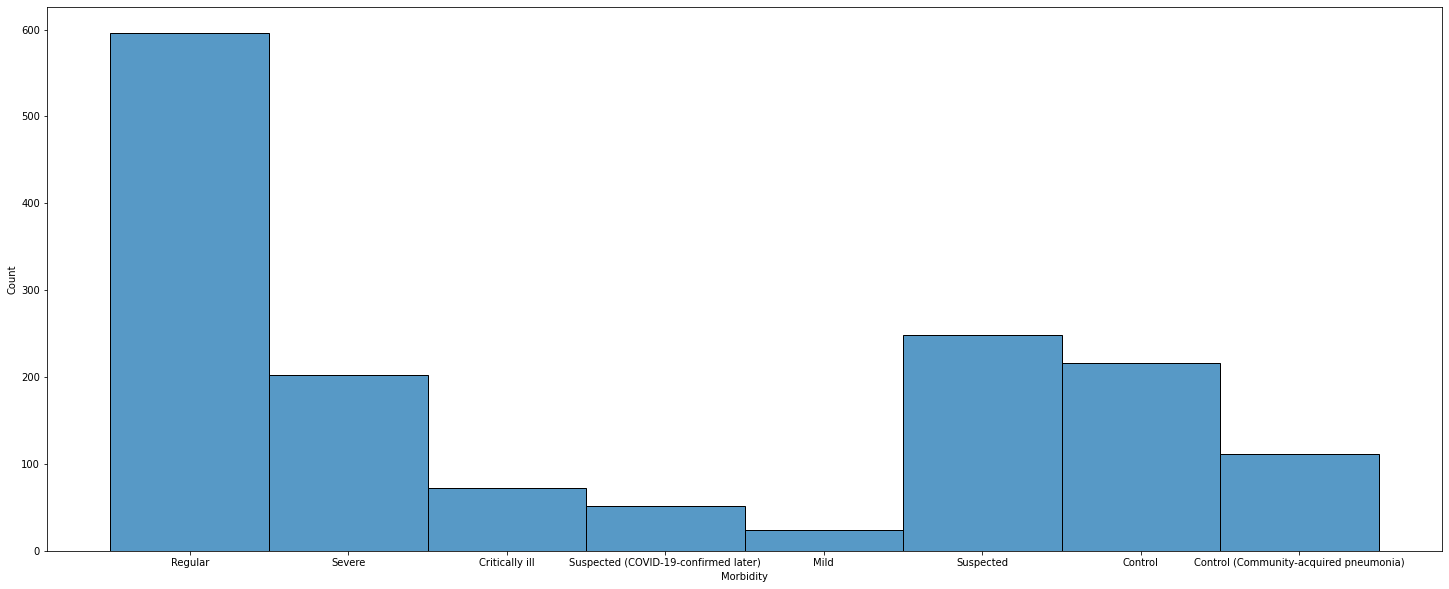

In [ ]:
plt.figure(figsize=(25,10))
sns.histplot(df['Morbidity'])
plt.show()

Regular category is too high, unbalanced data.
Will reduce by half.

Checking proportion of Covid19 postive vs negative case for all patient in the Morbitidy column

In [ ]:
pd.crosstab(df_filtered['Morbidity'], df_filtered['SARS-CoV-2_nucleic_acids'])

SARS-CoV-2_nucleic_acids,Negative,Negative; Positive (Confirmed later),Positive
Morbidity,,,
Control,216,0,0
Control (Community-acquired pneumonia),112,0,0
Critically ill,0,0,72
Mild,0,0,24
Regular,0,0,596
Severe,0,0,202
Suspected,248,0,0
Suspected (COVID-19-confirmed later),0,51,0


We will drop all 'suspected' (248 patients) because they are negative as well as the 'Suspected (COVID-19-confirmed later)' that turned out positive, because we do not have any detail on the morbidity status (51 patients)

In [ ]:
# dropping all suspected cases categories

In [ ]:
df_filtered.drop(df_filtered[df_filtered['Morbidity'] ==  'Suspected (COVID-19-confirmed later)'].index, inplace=True)

In [ ]:
df_filtered.drop(df_filtered[df_filtered['Morbidity'] ==  'Suspected'].index, inplace=True)

In [ ]:
morbidity_sampled = df_filtered[df_filtered['Morbidity'] == 'Regular'].sample(n=300, replace=False, weights=None, random_state=0, axis=None)

In [ ]:
morbidity_sampled

,Unnamed: 0,Hospital,Age,Gender,Body_temperature,Underlying_diseases,SARS-CoV-2_nucleic_acids,CT,Morbidity,Mortality,MCHC,MCH,MCV,HCT,HGB,PDW,PLCT,MPV,PLT,BA,EO,MO,LY,NE,BAP,EOP,MOP,LYP,NEP,PLCR,RDWSD,RDWCV,RBC,WBC,ESR,CRP,PCT,DD,TT,FIB,...,BUN,CA,CL,CO2,CREA,GGT,GLB,K,MG,Na,PHOS,TBIL,TP,URIC,CHOL,CK,HDLC,LDH,TG,AnG,DBIL,GLU,LDLC,OSM,PA,TBA,HBDH,CysC,HC,SAA,SdLDL,BC,NKC,CD4/CD8,IL-2,IL-4,IL-6,IL-10,TNF,IFN
patient_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Patient 1070,0,Liyuan,24,Male,36.5,No,Positive,Positive,Regular,Cured,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 288,0,Union,30,Male,39.0,"Hypertension, Hyperuricemia",Positive,Positive,Regular,Cured,338.0,31.1,92.2,39.2,132.0,16.2,0.20,9.3,214.0,0.01,0.01,0.31,2.52,2.19,0.20,0.10,6.20,50.1,43.40,NaN,NaN,NaN,4.25,5.04,NaN,NaN,NaN,0.28,14.70,6.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 440,0,Union,54,Male,38.3,"Fatty liver, Hyperlipoidemia, Renal calculi",Positive,Positive,Regular,Cured,330.0,28.1,85.3,36.7,121.0,16.3,0.24,8.8,269.0,0.02,0.09,0.55,0.83,3.54,0.40,1.80,11.00,16.6,70.20,18.7,36.8,12.5,4.31,5.03,NaN,120.00,<0.13,2.08,17.40,7.95,...,3.11,2.12,99.4,23.5,78.3,77.0,27.9,3.46,1.12,138.9,1.18,13.0,59.8,263.5,3.35,127.00,0.68,299.0,1.04,16.0,5.0,5.42,2.16,293.3,0.11,1.9,181.0,0.84,6.00,701.0,0.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 493,0,Union,66,Male,38.0,No,Positive,Positive,Regular,Cured,341.0,35.5,104.0,41.2,141.0,16.4,0.23,7.1,326.0,0.02,0.08,0.66,2.23,3.58,0.36,1.25,10.08,33.9,54.44,NaN,NaN,12.1,3.96,6.58,19.00,21.00,<0.13,0.20,18.10,3.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.14,2.53,1.90,3.63,2.43,7.91,1.73
Patient 161,0,Union,32,Female,38.9,No,Positive,Positive,Regular,Cured,324.0,29.4,90.8,37.3,121.0,11.1,0.13,9.7,136.0,0.01,0.01,0.33,1.17,2.77,0.20,0.20,7.70,27.3,64.60,22.9,43.3,12.9,4.11,4.29,NaN,3.17,0.18,NaN,NaN,NaN,...,2.19,2.18,102.3,23.4,59.2,18.0,27.0,4.59,0.84,138.5,0.93,3.5,67.0,180.6,NaN,NaN,NaN,NaN,NaN,13.0,0.8,NaN,NaN,NaN,0.19,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.34,1.67,3.15,2.94,1.83,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patient 579,0,Union,71,Female,37.4,Hypertension,Positive,Positive,Regular,Cured,342.0,32.4,94.8,32.7,112.0,16.4,0.11,8.7,132.0,0.01,0.00,0.34,0.98,1.89,0.35,0.06,10.46,30.6,58.57,NaN,NaN,13.0,3.45,3.22,8.00,<3.14,<0.13,1.41,17.20,2.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.76,2.40,2.16,10.86,3.38,3.67,2.04
Patient 456,0,Union,56,Male,36.2,No,Positive,Positive,Regular,Cured,348.0,31.9,91.8,43.7,152.0,17.3,0.15,12.6,120.0,0.01,0.03,0.57,1.01,2.43,0.20,0.70,14.10,24.9,60.10,44.6,38.9,11.6,4.76,4.05,29.00,8.83,<0.13,0.42,17.60,5.95,...,5.98,2.14,98.9,27.7,85.2,29.0,20.7,4.72,0.80,139.0,1.06,8.8,58.1,249.3,3.80,32.00,0.57,343.0,2.24,12.0,3.2,9.75,2.34,303.2,0.17,1.2,241.0,0.81,15.90,28.1,0.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 1321,0,Union,32,Male,39.9,After polypectomy,Positive,Positive,Regular,Cured,345.0,28.8,83.4,41.3,142.0,16.0,0.14,9.4,147.0,0.00,0.00,0.27,0.49,6.61,0.00,0.00,3.70,6.6,89.70,NaN,NaN,NaN,4.95,7.37,53.00,118.81,NaN,0.18,15.50,4.63,...,3.17,1.78,98.8,26.5,81.0,29.0,27.3,2.95,0.77,134.6,0.62,11.9,60.9

In [ ]:
df2 = df_filtered[~df_filtered.index.isin(morbidity_sampled.index)]

In [ ]:
#pd.set_option('display.max_rows', None)

In [ ]:
df2.dtypes

Unnamed: 0            int64
Hospital             object
Age                   int64
Gender               object
Body_temperature    float64
                     ...   
IL-4                float64
IL-6                float64
IL-10               float64
TNF                 float64
IFN                 float64
Length: 88, dtype: object

In [ ]:
df2.shape

(922, 88)

In [ ]:
# 3 tables generation

In [ ]:
# Negative table

## Morbidity plot with filtered dataframe

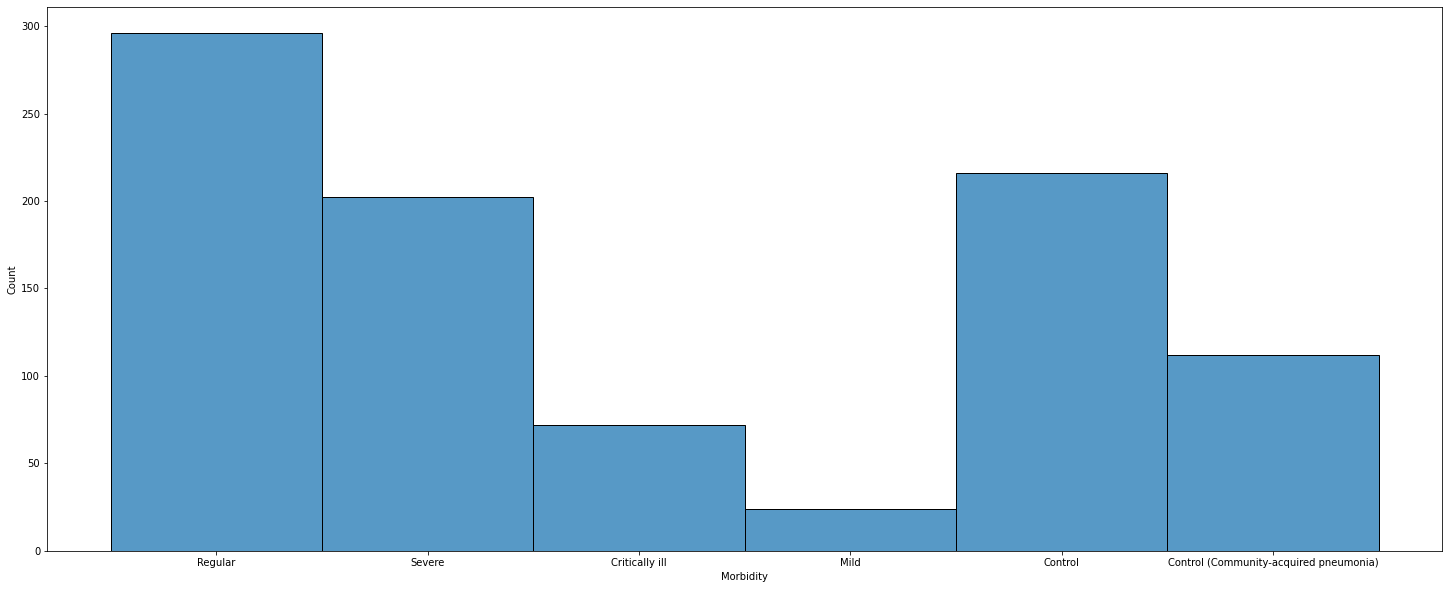

In [ ]:
plt.figure(figsize=(25,10))
sns.histplot(df2['Morbidity'])
plt.show()

In [ ]:
#patient ids and target group /cured / desceased

In [ ]:
df2['target']=np.where(df2['SARS-CoV-2_nucleic_acids']=='Negative', 0, np.where(df2['Morbidity'].isin(['Severe','Critically ill']) , 2, 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Setting mortality target

In [ ]:
df2['target_mortality']=np.where(df2['Mortality']=='Cured', 0, np.where(df2['Mortality'].isin(['Deceased']) , 1, 2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#pd.set_option('display.max_columns', None)df2['target_mortality']

In [ ]:
df2['target_mortality'].value_counts()

2    445
0    420
1     57
Name: target_mortality, dtype: int64

In [ ]:
df_nina = df2

In [ ]:
df_nina

,Hospital,Age,Gender,Body_temperature,Underlying_diseases,SARS-CoV-2_nucleic_acids,CT,Morbidity,Mortality,MCHC,...,NKC,CD4/CD8,IL-2,IL-4,IL-6,IL-10,TNF,IFN,target,target_mortality
patient_no,,,,,,,,,,,,,,,,,,,,,
Patient 3,Union,65.0,Female,38.5,Postoperative cervical cancer,Positive,Positive,Regular,Cured,330.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
Patient 4,Union,73.0,Male,38.5,Aorta calcification,Positive,Positive,Severe,Cured,337.0,...,13.64,3.10,2.50,2.26,60.28,6.58,2.20,3.07,2,0
Patient 5,Union,64.0,Female,38.0,No,Positive,Positive,Severe,Cured,329.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
Patient 6,Union,61.0,Female,37.6,"Asthma, Hypertension, Diabetes",Positive,Positive,Severe,Cured,348.0,...,19.61,1.24,2.63,1.53,24.13,4.70,2.03,1.63,2,0
Patient 7,Union,23.0,Female,38.7,No,Positive,NaN,Regular,Unknown,346.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patient 1514,Union,60.0,Male,36.5,Postoperative cerebral aneurysm,Negative,Negative,Control,Unknown,316.0,...,NaN,NaN,3.34,3.48,3.76,4.17,3.51,3.24,0,2
Patient 1515,Union,53.0,Female,38.0,"Chronic renal failure, ANCA-associated glomeru...",Negative,Negative,Control,Unknown,321.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2
Patient 1516,Union,52.0,Male,38.9,No,Positive,Positive,Severe,Cured,335.0,...,13.42,2.01,3.10,3.69,30.36,12.45,3.90,8.32,2,0


In [ ]:
# V2

In [ ]:
df_negative = df_nina[df_nina['SARS-CoV-2_nucleic_acids'] == 'Negative' and df_nina['target'] == 1] 

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
df_negative = df_negative[['SARS-CoV-2_nucleic_acids', ]]

,Hospital,Age,Gender,Body_temperature,Underlying_diseases,SARS-CoV-2_nucleic_acids,CT,Morbidity,Mortality,MCHC,...,NKC,CD4/CD8,IL-2,IL-4,IL-6,IL-10,TNF,IFN,target,target_mortality
patient_no,,,,,,,,,,,,,,,,,,,,,
Patient 121,Union,67.0,Male,36.6,"Hypertension, Myocardial infarction, Cholecyst...",Negative,Negative,Control,Unknown,340.0,...,NaN,NaN,3.04,2.59,10.77,5.78,2.79,4.68,0,2
Patient 123,Union,65.0,Male,39.0,"Gout, Hypertension, Renal failure",Negative,NaN,Control,Unknown,316.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2
Patient 144,Union,33.0,Female,39.0,No,Negative,Negative,Control,Unknown,323.0,...,8.33,1.62,NaN,NaN,NaN,NaN,NaN,NaN,0,2
Patient 145,Union,38.0,Female,37.5,No,Negative,Negative,Control,Unknown,340.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2
Patient 148,Union,24.0,Male,38.3,No,Negative,Negative,Control,Unknown,338.0,...,23.13,1.57,2.84,2.26,6.06,4.27,2.49,2.77,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patient 1511,Union,20.0,Male,36.6,Acute myeloid leukemia,Negative,Negative,Control,Unknown,350.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2
Patient 1512,Union,47.0,Male,38.0,No,Negative,Negative,Control,Unknown,323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2
Patient 1513,Union,60.0,Male,36.6,"Diabetes, Diabetic nephropathy, Post-cerebral ...",Negative,Negative,Control,Unknown,332.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2


In [ ]:
df2['SARS-CoV-2_nucleic_acids'].value_counts()

Positive    594
Negative    328
Name: SARS-CoV-2_nucleic_acids, dtype: int64

In [ ]:
df2['Mortality'].value_counts()

Unknown     445
Cured       420
Deceased     57
Name: Mortality, dtype: int64

In [ ]:
df2.drop(df2[df2['Mortality'] == 'Unknown'].index, inplace=True)

/Users/cyrilaubrymba/.pyenv/versions/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
df2['Mortality'].value_counts()

Cured       420
Deceased     57
Name: Mortality, dtype: int64

In [ ]:
df2.columns

Index(['Hospital', 'Age', 'Gender', 'Body_temperature', 'Underlying_diseases',
       'SARS-CoV-2_nucleic_acids', 'CT', 'Morbidity', 'Mortality', 'MCHC',
       'MCH', 'MCV', 'HCT', 'HGB', 'PDW', 'PLCT', 'MPV', 'PLT', 'BA', 'EO',
       'MO', 'LY', 'NE', 'BAP', 'EOP', 'MOP', 'LYP', 'NEP', 'PLCR', 'RDWSD',
       'RDWCV', 'RBC', 'WBC', 'ESR', 'CRP', 'PCT', 'DD', 'TT', 'FIB', 'APTT',
       'INR', 'PT', 'ALG', 'ALB', 'ALP', 'ALT', 'AST', 'BUN', 'CA', 'CL',
       'CO2', 'CREA', 'GGT', 'GLB', 'K', 'MG', 'Na', 'PHOS', 'TBIL', 'TP',
       'URIC', 'CHOL', 'CK', 'HDLC', 'LDH', 'TG', 'AnG', 'DBIL', 'GLU', 'LDLC',
       'OSM', 'PA', 'TBA', 'HBDH', 'CysC', 'HC', 'SAA', 'SdLDL', 'BC', 'NKC',
       'CD4/CD8', 'IL-2', 'IL-4', 'IL-6', 'IL-10', 'TNF', 'IFN', 'target',
       'target_mortality'],
      dtype='object')

In [ ]:
# Creating df3 dataframe, only integrating most valuable features as per the published articled (cure vs desceased)

In [ ]:
#df3

In [ ]:
#df2.to_csv('df2.csv')

In [ ]:
# For target checking for n patients

In [ ]:
# patients_list = [range(1,922)]
# patient_list_target = []

# for patient in patients_list:
#     target_result = df2['target'].values[patient]
#     patient_list_target.append(target_result)

In [ ]:
for c in ['Age', 'Body_temperature',
       'MCHC',
       'MCH', 'MCV', 'HCT', 'HGB', 'PDW', 'PLCT', 'MPV', 'PLT', 'BA', 'EO',
       'MO', 'LY', 'NE', 'BAP', 'EOP', 'MOP', 'LYP', 'NEP', 'PLCR', 'RDWSD',
       'RDWCV', 'RBC', 'WBC', 'ESR', 'CRP', 'PCT', 'DD', 'TT', 'FIB', 'APTT',
       'INR', 'PT', 'ALG', 'ALB', 'ALP', 'ALT', 'AST', 'BUN', 'CA', 'CL',
       'CO2', 'CREA', 'GGT', 'GLB', 'K', 'MG', 'Na', 'PHOS', 'TBIL', 'TP',
       'URIC', 'CHOL', 'CK', 'HDLC', 'LDH', 'TG', 'AnG', 'DBIL', 'GLU', 'LDLC',
       'OSM', 'PA', 'TBA', 'HBDH', 'CysC', 'HC', 'SAA', 'SdLDL', 'BC', 'NKC',
       'CD4/CD8', 'IL-2', 'IL-4', 'IL-6', 'IL-10', 'TNF', 'IFN']:
    if df2[c].dtype  == 'object':
        try:
            df2[c] = df2[c].str.replace(">", "")
            df2[c] = df2[c].str.replace("<", "")
            df2[c] = pd.to_numeric(df2[c], errors='coerce').astype('float64')
        except: ValueError

<ipython-input-56-7068aca205d3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[c] = df2[c].str.replace(">", "")
<ipython-input-56-7068aca205d3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[c] = df2[c].str.replace("<", "")
<ipython-input-56-7068aca205d3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [ ]:
df3 = df2[['target', 'target_mortality', 'NEP', 'Age', 'LDH', 'NE', 'LYP', 'LY', 'ALB', 'EOP', 'EO', 'ALG', 'CA', 'MOP', 'INR', 'BUN', 'TBIL', 'WBC', 'DD']]

In [ ]:
df4 = df2[['target', 'target_mortality', 'NEP', 'Age', 'LDH', 'NE', 'LYP', 'LY', 'ALB']]

In [ ]:
#df2.dtypes

In [ ]:
df2.select_dtypes(include='object')

,Hospital,Gender,Underlying_diseases,SARS-CoV-2_nucleic_acids,CT,Morbidity,Mortality
patient_no,,,,,,,
Patient 3,Union,Female,Postoperative cervical cancer,Positive,Positive,Regular,Cured
Patient 4,Union,Male,Aorta calcification,Positive,Positive,Severe,Cured
Patient 5,Union,Female,No,Positive,Positive,Severe,Cured
Patient 6,Union,Female,"Asthma, Hypertension, Diabetes",Positive,Positive,Severe,Cured
Patient 10,Union,Female,Cholecystectomy,Positive,Positive,Severe,Cured
...,...,...,...,...,...,...,...
Patient 1408,Union,Female,No,Positive,Positive,Severe,Cured
Patient 1409,Union,Male,Hypertension,Positive,Positive,Severe,Cured
Patient 1516,Union,Male,No,Positive,Positive,Severe,Cured


## Pipeline

### Preprocessing

In [ ]:
def clean(df):
    replacement = {
        "<": "",
        ">": "",
    }
    for feature in df.columns:
        try:
            df[feature] = df[feature].str.replace(replacement, regex=True ).astype(float)
        except AttributeError:
            pass
    return df

In [ ]:
def target_set(df):
    df['target_mortality']=np.where(df['Mortality']=='Cured', 0, np.where(df['Mortality'].isin(['Deceased']) , 1, 2))
    return df[['target_mortality']]

In [ ]:
pipe_clean = Pipeline([
    ('selector1', FunctionTransformer(lambda df: df[['NEP', 'Age', 'LDH', 'NE', 'LYP', 'LY', 'ALB', 'EOP', 'EO', 'ALG', 'CA', 'MOP', 'INR', 'BUN', 'TBIL', 'WBC', 'DD']])),
    ('clean', FunctionTransformer(clean)),
])

pipe_target = Pipeline([
    # ('selector2', FunctionTransformer(lambda df: df['Mortality'])), 
    ('target', FunctionTransformer(target_set) ) 
    ])


fu = FeatureUnion([('pipe_target', pipe_target),('pipe_clean', pipe_clean), ])

In [ ]:
df.columns

Index(['Unnamed: 0', 'Hospital', 'Age', 'Gender', 'Body_temperature',
       'Underlying_diseases', 'SARS-CoV-2_nucleic_acids', 'CT', 'Morbidity',
       'Mortality',
       ...
       'BYST', 'MS-U', 'UNCX', 'URBC', 'UWBC', 'SG', 'PH', 'WBCC', 'BACT',
       'target_mortality'],
      dtype='object', length=131)

In [ ]:
fu

FeatureUnion(n_jobs=None,
             transformer_list=[('pipe_target',
                                Pipeline(memory=None,
                                         steps=[('target',
                                                 FunctionTransformer(accept_sparse=False,
                                                                     check_inverse=True,
                                                                     func=<function target_set at 0x7f6850cef560>,
                                                                     inv_kw_args=None,
                                                                     inverse_func=None,
                                                                     kw_args=None,
                                                                     validate=False))],
                                         verbose=False)),
                               ('pipe_clean',
                                Pipeline(memory=None,
                

In [ ]:
pipe_clean.fit_transform(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,NEP,Age,LDH,NE,LYP,LY,ALB,EOP,EO,ALG,CA,MOP,INR,BUN,TBIL,WBC,DD
patient_no,,,,,,,,,,,,,,,,,
Patient 1,46.70,81,299.0,1.13,41.2,1.00,34.7,3.10,0.07,1.2,2.08,8.70,1.11,6.96,9.8,2.42,126.0
Patient 2,61.60,50,392.0,1.20,33.8,0.66,40.9,0.00,0.00,1.6,2.29,4.60,0.91,4.05,9.5,1.95,35.0
Patient 3,75.10,65,297.0,3.01,16.9,0.68,30.0,0.10,0.00,0.9,1.77,7.50,NaN,6.07,4.7,4.01,NaN
Patient 4,79.70,73,546.0,4.19,13.9,0.73,31.7,0.00,0.00,1.2,2.05,5.80,0.94,6.63,9.6,5.25,170.0
Patient 5,71.60,64,NaN,5.23,22.4,1.64,NaN,0.00,0.00,NaN,NaN,5.90,NaN,NaN,NaN,7.31,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patient 1517,52.60,45,337.0,2.22,34.1,1.44,34.1,2.40,0.10,1.1,2.09,10.40,1.22,3.19,8.6,4.22,22.0
Patient 1518,45.13,66,NaN,2.73,42.6,2.57,NaN,1.58,0.10,NaN,NaN,9.53,NaN,NaN,NaN,6.05,NaN
Patient 1519,40.60,71,NaN,1.63,44.5,1.79,NaN,1.18,0.05,NaN,NaN,13.22,NaN,NaN,NaN,4.02,NaN


In [ ]:
pipe_target.fit_transform(df.head(5))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,target_mortality
patient_no,
Patient 1,0
Patient 2,0
Patient 3,0
Patient 4,0
Patient 5,0


In [ ]:
fu.fit_transform(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


array([[  0.  ,  46.7 ,  81.  , ...,   9.8 ,   2.42, 126.  ],
       [  0.  ,  61.6 ,  50.  , ...,   9.5 ,   1.95,  35.  ],
       [  0.  ,  75.1 ,  65.  , ...,   4.7 ,   4.01,    nan],
       ...,
       [  0.  ,  40.6 ,  71.  , ...,    nan,   4.02,    nan],
       [  0.  ,  63.3 ,  66.  , ...,    nan,   5.17,    nan],
       [  0.  ,  54.91,  64.  , ...,    nan,   5.14,    nan]])

In [ ]:
df.head(1)

,Unnamed: 0,Hospital,Age,Gender,Body_temperature,Underlying_diseases,SARS-CoV-2_nucleic_acids,CT,Morbidity,Mortality,MCHC,MCH,MCV,HCT,HGB,PDW,PLCT,MPV,PLT,BA,EO,MO,LY,NE,BAP,EOP,MOP,LYP,NEP,PLCR,RDWSD,RDWCV,RBC,WBC,ESR,CRP,PCT,HSCRP,DD,TT,...,IBIL,FDG,LPS,LAC,BNP,SA,CD3+,CD4+,CD8+,BC,NKC,CD4/CD8,IL-2,IL-4,IL-6,IL-10,TNF,IFN,C1q,C3,C4,IGM,IGA,IGG,ASO,RF,UALB,SQEP,NSEC,HYAL,UNCC,BYST,MS-U,UNCX,URBC,UWBC,SG,PH,WBCC,BACT
patient_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Patient 1,0,Union,81,Male,36.6,"Hypertension, Thyroidectomy",Positive,Positive,Regular,Cured,344.0,31.2,90.7,35.8,123.0,16.4,0.26,8.5,304.0,0.01,0.07,0.21,1.0,1.13,0.3,3.1,8.7,41.2,46.7,17.2,39.3,12.5,3.94,2.42,22.00,15.40,<0.13,NaN,1.26,17.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.56,5.72,2.35,2.53,2.21,9.59,4.48,1.67,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#X.select_dtypes(include='float64', exclude=None)

In [ ]:
X = df3.drop(columns = ['target', 'target_mortality'])
y = df3['target_mortality']

model = LogisticRegression()

num_transformer = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('inputer_object', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

preprocessor = ColumnTransformer([
    ('num_transformer', num_transformer, make_column_selector(dtype_include="float64")),
    ('cat_transformer', cat_transformer, make_column_selector(dtype_include=['object', 'O']))],
     remainder='passthrough')
    
staging_pipe = Pipeline([('featureUnion', fu)])

final_pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('linear_regression', LogisticRegression())
    ])
# X_preproc = pd.DataFrame(preprocessor.fit_transform(X))

In [ ]:
staging=pd.DataFrame(staging_pipe.fit_transform(df),columns=["target",'NEP', 'Age', 'LDH', 'NE', 'LYP', 'LY', 'ALB', 'EOP', 'EO', 'ALG', 'CA', 'MOP', 'INR', 'BUN', 'TBIL', 'WBC', 'DD'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
staging.drop(columns=['target'])

,NEP,Age,LDH,NE,LYP,LY,ALB,EOP,EO,ALG,CA,MOP,INR,BUN,TBIL,WBC,DD
0,46.70,81.0,299.0,1.13,41.2,1.00,34.7,3.10,0.07,1.2,2.08,8.70,1.11,6.96,9.8,2.42,126.0
1,61.60,50.0,392.0,1.20,33.8,0.66,40.9,0.00,0.00,1.6,2.29,4.60,0.91,4.05,9.5,1.95,35.0
2,75.10,65.0,297.0,3.01,16.9,0.68,30.0,0.10,0.00,0.9,1.77,7.50,NaN,6.07,4.7,4.01,NaN
3,79.70,73.0,546.0,4.19,13.9,0.73,31.7,0.00,0.00,1.2,2.05,5.80,0.94,6.63,9.6,5.25,170.0
4,71.60,64.0,NaN,5.23,22.4,1.64,NaN,0.00,0.00,NaN,NaN,5.90,NaN,NaN,NaN,7.31,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,52.60,45.0,337.0,2.22,34.1,1.44,34.1,2.40,0.10,1.1,2.09,10.40,1.22,3.19,8.6,4.22,22.0
1517,45.13,66.0,NaN,2.73,42.6,2.57,NaN,1.58,0.10,NaN,NaN,9.53,NaN,NaN,NaN,6.05,NaN
1518,40.60,71.0,NaN,1.63,44.5,1.79,NaN,1.18,0.05,NaN,NaN,13.22,NaN,NaN,NaN,4.02,NaN
1519,63.30,66.0,NaN,3.27,25.3,1.31,NaN,2.55,0.13,NaN,NaN,8.60,NaN,NaN,NaN,5.17,NaN


In [ ]:
model = final_pipe.fit(staging.drop(columns=['target']),staging['target'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
model.predict()

Pipeline(memory=None,
         steps=[('featureUnion',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('pipe_target',
                                                 Pipeline(memory=None,
                                                          steps=[('target',
                                                                  FunctionTransformer(accept_sparse=False,
                                                                                      check_inverse=True,
                                                                                      func=<function target_set at 0x7f6850cef560>,
                                                                                      inv_kw_args=None,
                                                                                      inverse_func=None,
                                                                                      kw_args=None,
                                     

In [ ]:
fu.fit_transform(df[['Mortality','NEP', 'Age', 'LDH', 'NE', 'LYP', 'LY', 'ALB', 'EOP', 'EO', 'ALG', 'CA', 'MOP', 'INR', 'BUN', 'TBIL', 'WBC', 'DD']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


ValueError: ignored

### Logistic Regression model

In [ ]:
#X = X_preproc
#y = df2['target_mortality']


model = LogisticRegression()

final_pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('linear_regression', LogisticRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3)


results = final_pipe.fit(X_train, y_train)

# 
#('preprocessing', preprocessor),

In [ ]:
from sklearn.model_selection import cross_validate

model = LinearRegression()
cv_results = cross_validate(model, preprocessor.fit_transform(X_train), y_train, cv=5, 
                            scoring=['roc_auc',
                                    ])
results_table = pd.DataFrame(cv_results)
results_table

,fit_time,score_time,test_roc_auc
0,0.002959,0.001712,0.909962
1,0.001581,0.002017,0.814935
2,0.002361,0.001226,0.807018
3,0.001482,0.000962,0.891129
4,0.001280,0.000923,0.805556


In [ ]:
result_roc_mean = round(results_table['test_roc_auc'].mean(), 2)
result_roc_mean

0.85

In [ ]:
random_search = RandomizedSearchCV(
    final_pipe, 
    param_distributions={
        'linear_regression__C': uniform(loc=0, scale=4)},
        cv=5,
    scoring="roc_auc",
    return_train_score=True)


random_search.fit(X_train, y_train)



RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('preprocessing',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='passthrough',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('num_transformer',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('imputer',
                                                                                                SimpleImputer(add_indicator=False,
                                                                 

In [ ]:
random_search.best_params_

{'linear_regression__C': 0.25402012000120466}

In [ ]:
import joblib
joblib.dump(random_search.best_estimator_, 'my_model.pkl', compress=9)

Pipeline(memory=None,
         steps=[('preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num_transformer',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                           

In [ ]:
#final_pipe.get_params()

## Next steps

### Fine tuning, Confusion matrix, KNN model

In [ ]:
# # predictions
# final_pipe_trained.predict(X_test.iloc[:])

# # Score model
# final_pipe_trained.score(X_test,y_test)

In [ ]:
# from sklearn.model_selection import cross_val_score

# # Cross validate pipeline
# cross_val_score(final_pipe, X_train, y_train, cv=5, scoring='r2').mean()

In [ ]:
# y_test = [0, 1, 0, 0, 1, 0, 1, 1, 0, 1] # actual truths
# preds = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1] # predictions

# results_df = pd.DataFrame({"actual": y_test,
#                            "predicted": preds})#Store results in dataframe

# confusion_matrix = pd.crosstab(index= results_df['actual'],
#                                columns = results_df['predicted'])